In [ ]:
!nvidia-smi

Wed May 26 07:11:12 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import numpy as np 
import pandas as pd 
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
batch_size = 40
img_height = 200
img_width = 200

In [ ]:
## loading training data
training_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'drive/MyDrive/deep_learning/mask_data2',
    validation_split=0.2,
    subset= "training",
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size

)

Found 2896 files belonging to 2 classes.
Using 2317 files for training.


In [ ]:
## loading testing data
testing_ds = tf.keras.preprocessing.image_dataset_from_directory(
'drive/MyDrive/deep_learning/mask_data2',
    validation_split=0.2,
    subset= "validation",
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size

)

Found 2896 files belonging to 2 classes.
Using 579 files for validation.


In [ ]:
class_names = training_ds.class_names
print(class_names)

['with_mask', 'witthout_mask']


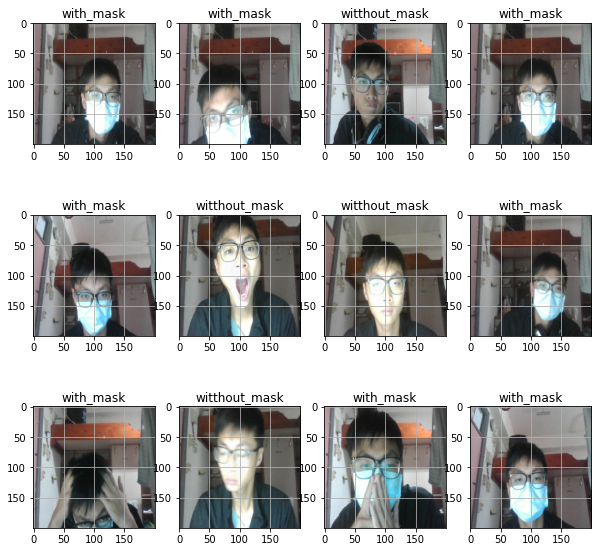

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in training_ds.take(1):
  for i in range(12):
    ax = plt.subplot(3, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.grid(True)

In [ ]:
## Configuring dataset for performance
AUTOTUNE = tf.data.experimental.AUTOTUNE
training_ds = training_ds.cache().prefetch(buffer_size=AUTOTUNE)
testing_ds = testing_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
## lets define our CNN
MyCnn = tf.keras.models.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, activation='relu'),
  layers.MaxPooling2D(),
  # Some thing I realised just
  # using flatten layer will 
  # increase the size of your
  # model, hence use
  # Global avg Pooling 
  # instead
  # layers.Flatten(),
  layers.GlobalAveragePooling2D(),
  layers.Dense(256, activation='relu'),
  layers.Dense(2, activation= 'softmax')
])

In [ ]:
MyCnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
## lets train our CNN
retVal = MyCnn.fit(training_ds, validation_data= testing_ds, epochs = 15)

Epoch 1/15
58/58 [==============================] - 470s 8s/step - loss: 0.6944 - accuracy: 0.4903 - val_loss: 0.6923 - val_accuracy: 0.5112
Epoch 2/15
58/58 [==============================] - 3s 46ms/step - loss: 0.6677 - accuracy: 0.5757 - val_loss: 0.6734 - val_accuracy: 0.5786
Epoch 3/15
58/58 [==============================] - 3s 45ms/step - loss: 0.3792 - accuracy: 0.8537 - val_loss: 0.2855 - val_accuracy: 0.9067
Epoch 4/15
58/58 [==============================] - 3s 45ms/step - loss: 0.2003 - accuracy: 0.9227 - val_loss: 0.1512 - val_accuracy: 0.9465
Epoch 5/15
58/58 [==============================] - 3s 44ms/step - loss: 0.2037 - accuracy: 0.9163 - val_loss: 0.2604 - val_accuracy: 0.8895
Epoch 6/15
58/58 [==============================] - 3s 45ms/step - loss: 0.1625 - accuracy: 0.9348 - val_loss: 0.1521 - val_accuracy: 0.9326
Epoch 7/15
58/58 [==============================] - 3s 45ms/step - loss: 0.1255 - accuracy: 0.9504 - val_loss: 0.0786 - val_accuracy: 0.9689
Epoch 8/15
58

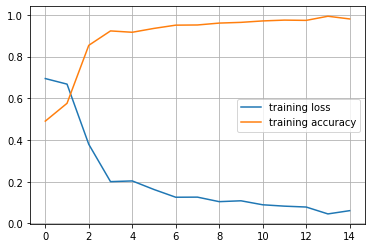

In [ ]:
plt.plot(retVal.history['loss'], label = 'training loss')
plt.plot(retVal.history['accuracy'], label = 'training accuracy')
plt.legend()
plt.grid()

In [ ]:
MyCnn.evaluate(testing_ds)

15/15 [==============================] - 0s 15ms/step - loss: 0.0663 - accuracy: 0.9724


[0.06630980223417282, 0.9723661541938782]

In [ ]:
MyCnn.save('drive/MyDrive/deep_learning/mask_data/maskDetector.h5')

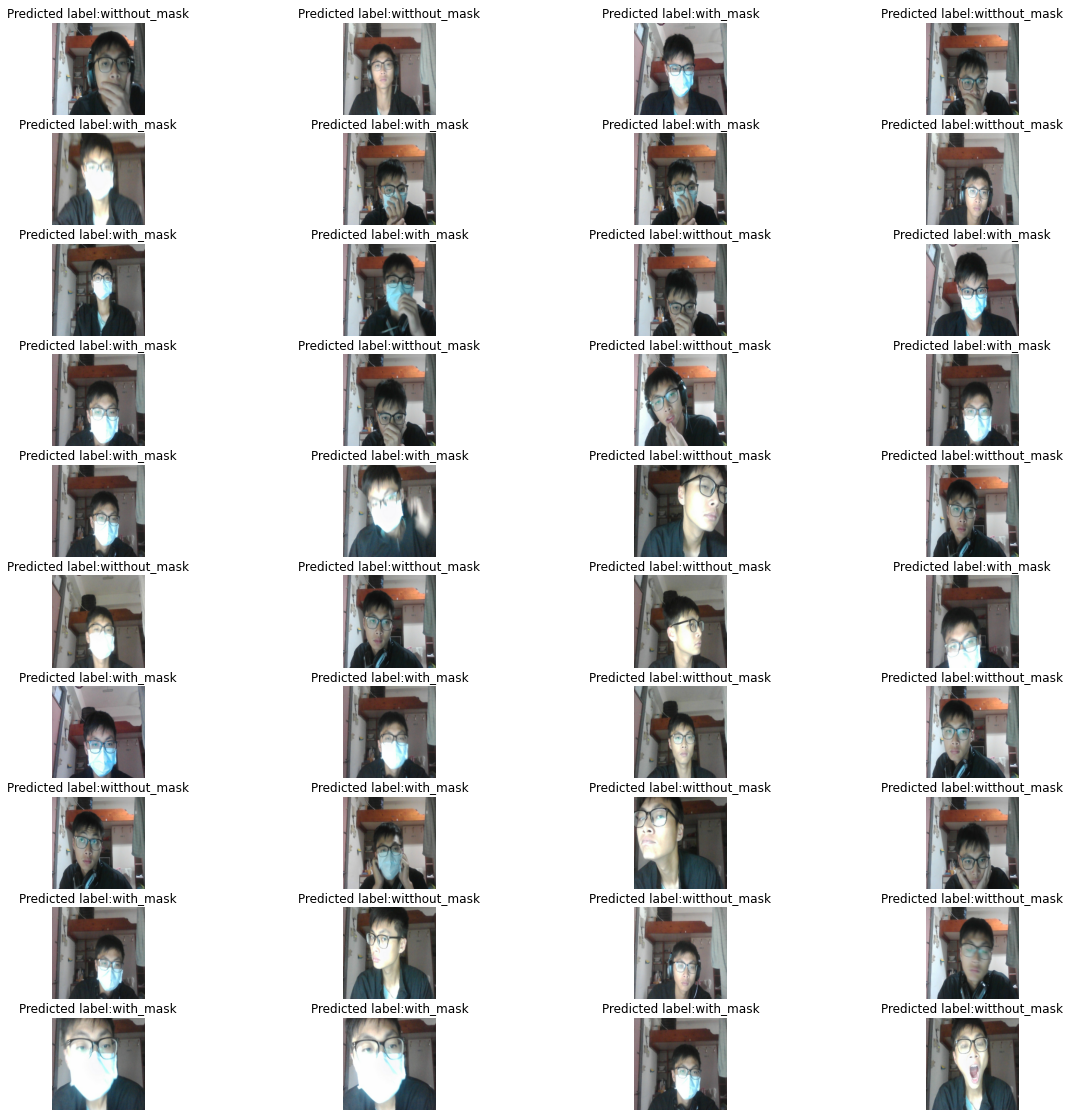

In [ ]:
plt.figure(figsize=(20, 20))
for images, labels in testing_ds.take(1):
    predictions = MyCnn.predict(images)
    predlabel = []
    
    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
    
    for i in range(40):
        ax = plt.subplot(10, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Predicted label:'+ predlabel[i])
        plt.axis('off')
        plt.grid(True)